# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../common-data/penguins_size.csv")
df = df.dropna()
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,m
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,f
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,f
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,f
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,m


In [3]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

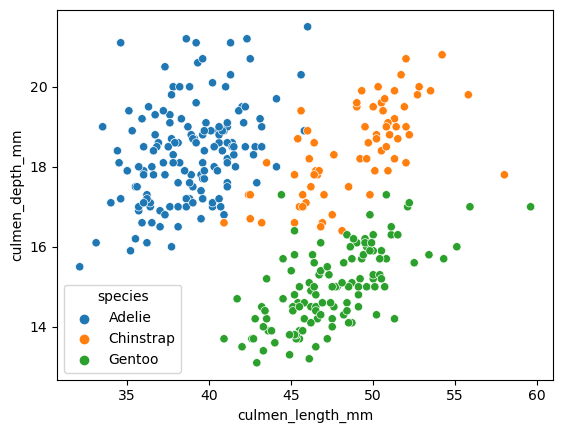

In [4]:
sns.scatterplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

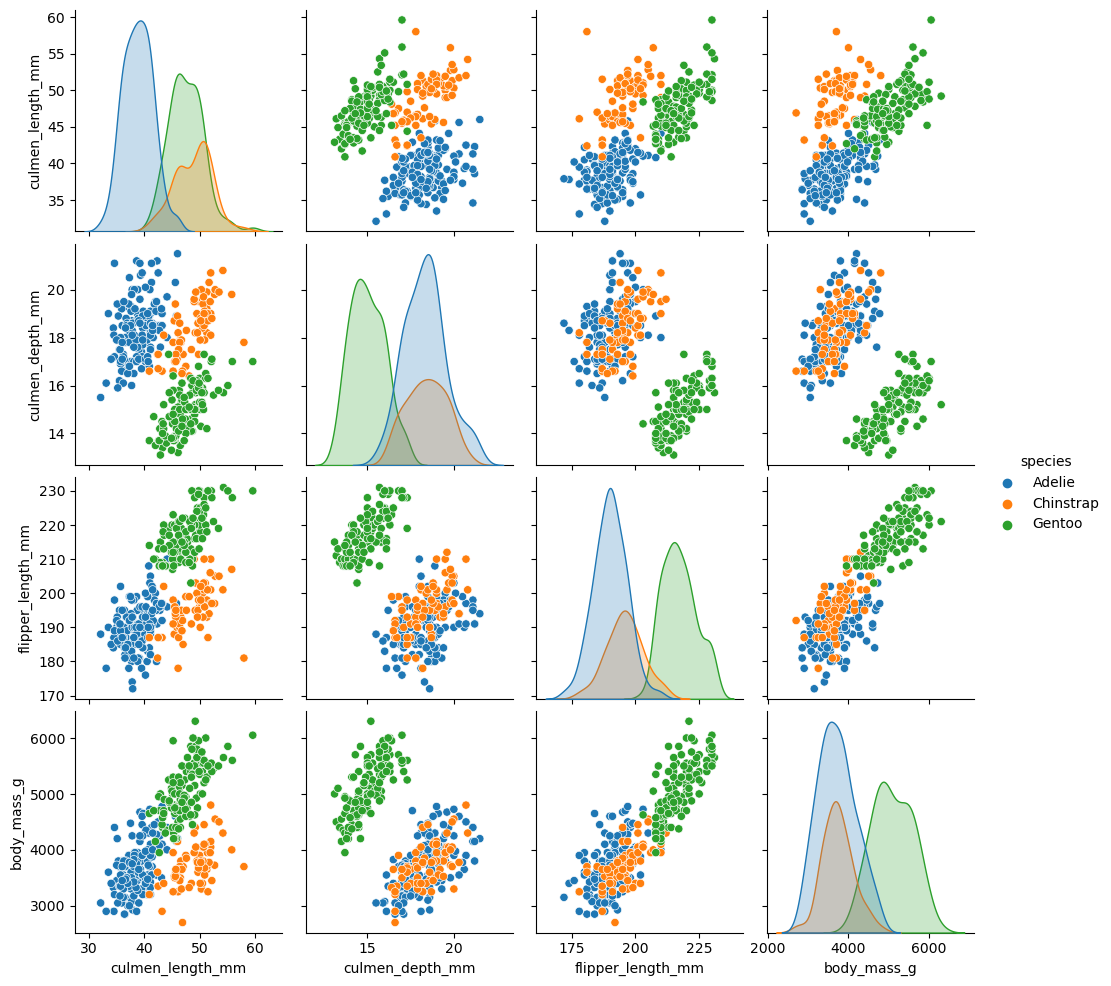

In [5]:
sns.pairplot(df, hue='species')

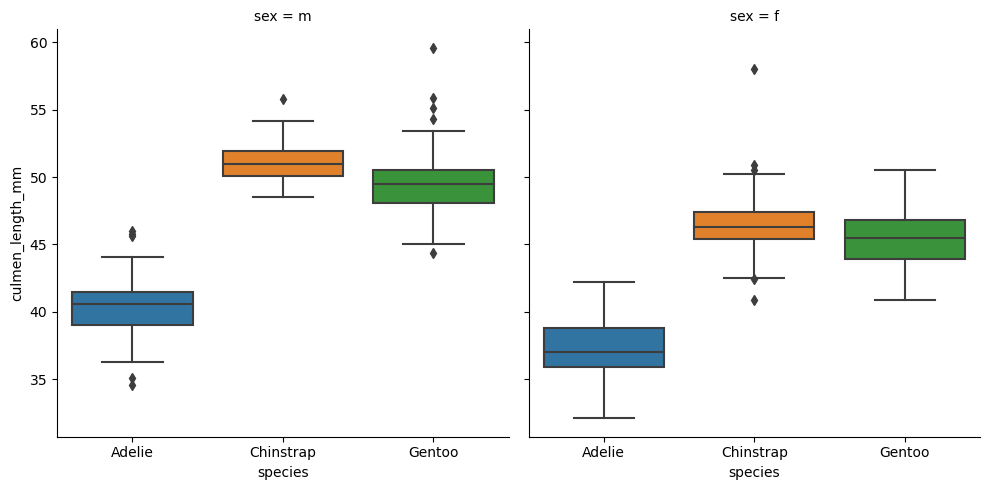

In [6]:
sns.catplot(data=df, x='species', y='culmen_length_mm', kind='box', col='sex')

## Train and Test splits

In [7]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Decision Tree Classifier

### Default Hyperparameters

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
base_pred = model.predict(X_test)

### Evaluation

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [14]:
cnf_matrix = confusion_matrix(y_test, base_pred)
cnf_matrix

array([[40,  1,  0],
       [ 1, 22,  0],
       [ 0,  0, 37]], dtype=int64)

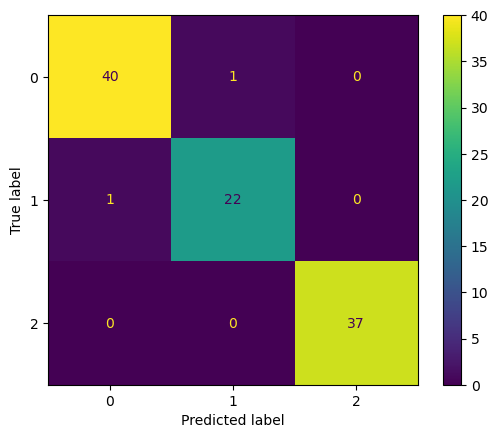

In [15]:
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
disp.plot()

In [16]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



In [17]:
model.feature_importances_

array([0.32591819, 0.04203954, 0.54282921, 0.        , 0.07836008,
       0.        , 0.01085298])

In [18]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_m,0.010853
culmen_depth_mm,0.042040
island_Dream,0.078360
culmen_length_mm,0.325918
flipper_length_mm,0.542829


<Axes: xlabel='species', ylabel='body_mass_g'>

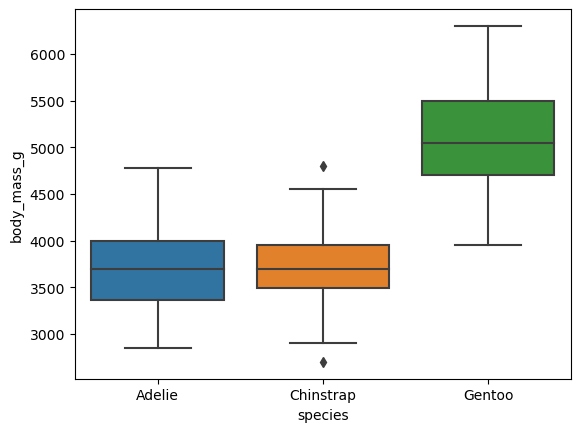

In [19]:
sns.boxplot(data=df, x='species', y='body_mass_g')

### Visualize the Tree

In [20]:
from sklearn.tree import plot_tree

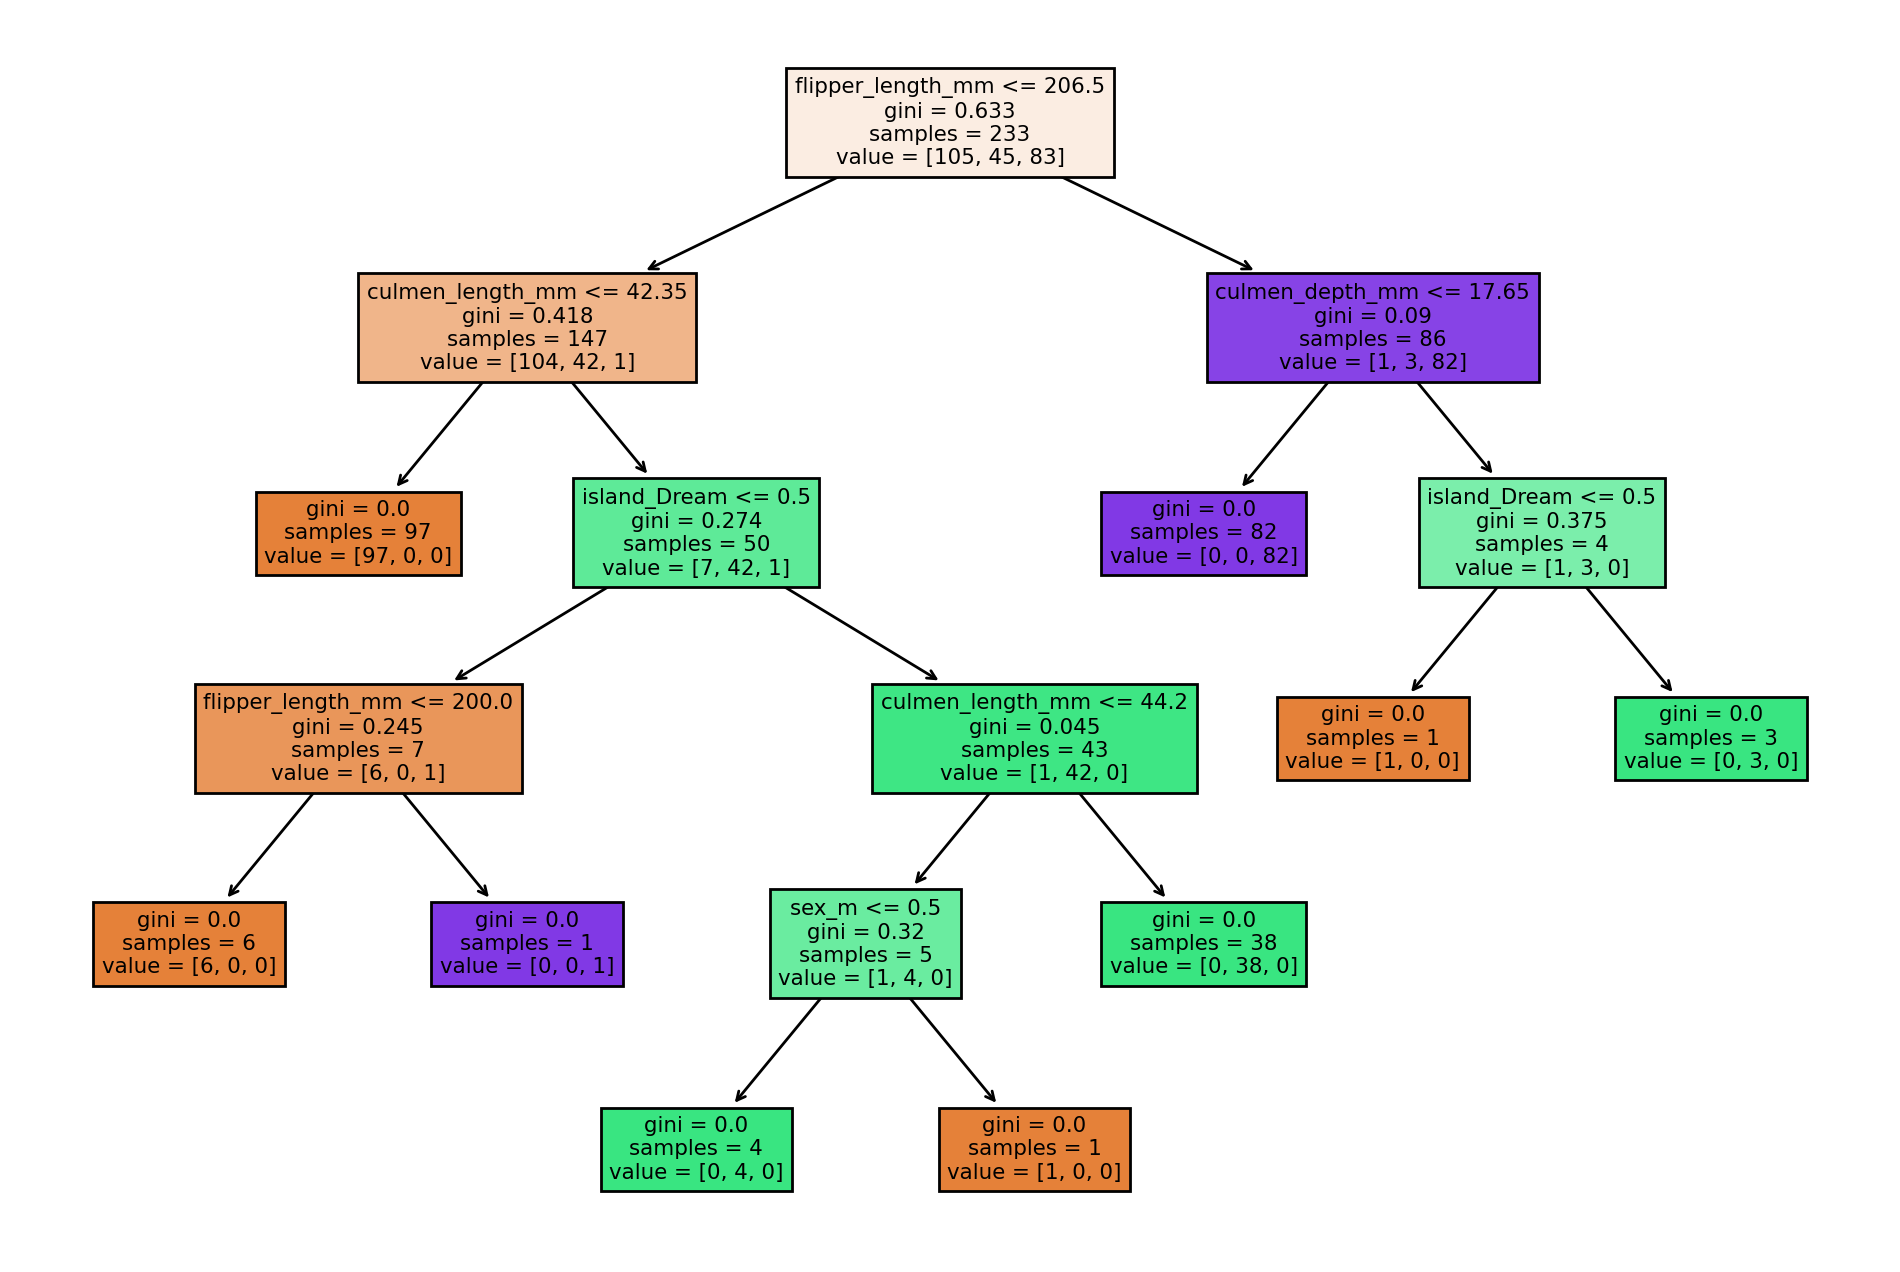

In [21]:
plt.figure(figsize=(12, 8), dpi=200)
plot_tree(model, feature_names=X.columns, filled=True);

## Reporting Model Results

In [22]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12, 8))
    plot_tree(model, feature_names=X.columns, filled=True,);

### Experiment with Max Depth

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.81      0.96      0.88        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.94       101
   macro avg       0.93      0.94      0.93       101
weighted avg       0.95      0.94      0.94       101





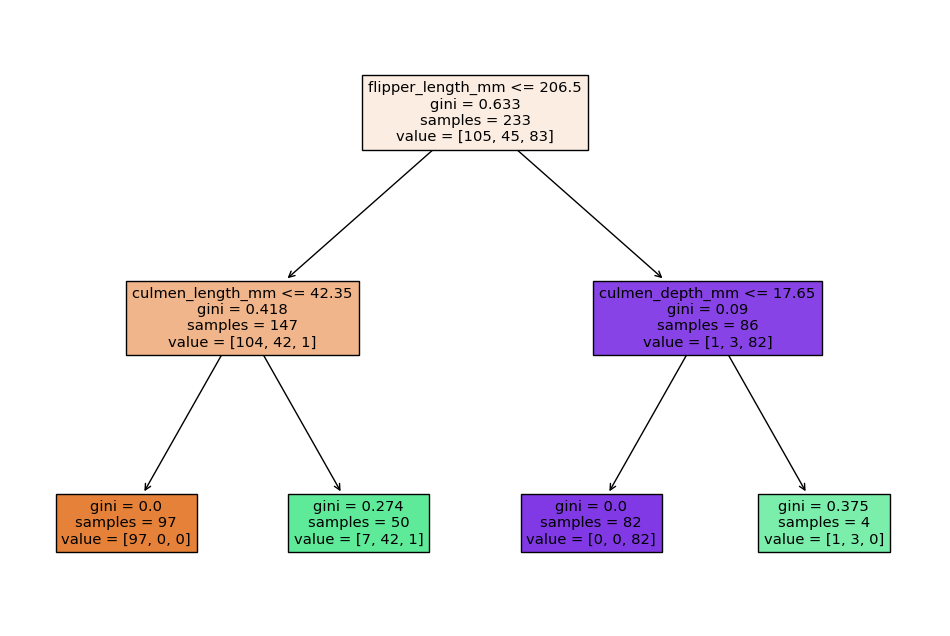

In [23]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train, y_train)

report_model(pruned_tree)

### Experiment with Max Leaf Nodes

              precision    recall  f1-score   support

      Adelie       0.97      0.88      0.92        41
   Chinstrap       0.83      0.87      0.85        23
      Gentoo       0.93      1.00      0.96        37

    accuracy                           0.92       101
   macro avg       0.91      0.92      0.91       101
weighted avg       0.92      0.92      0.92       101





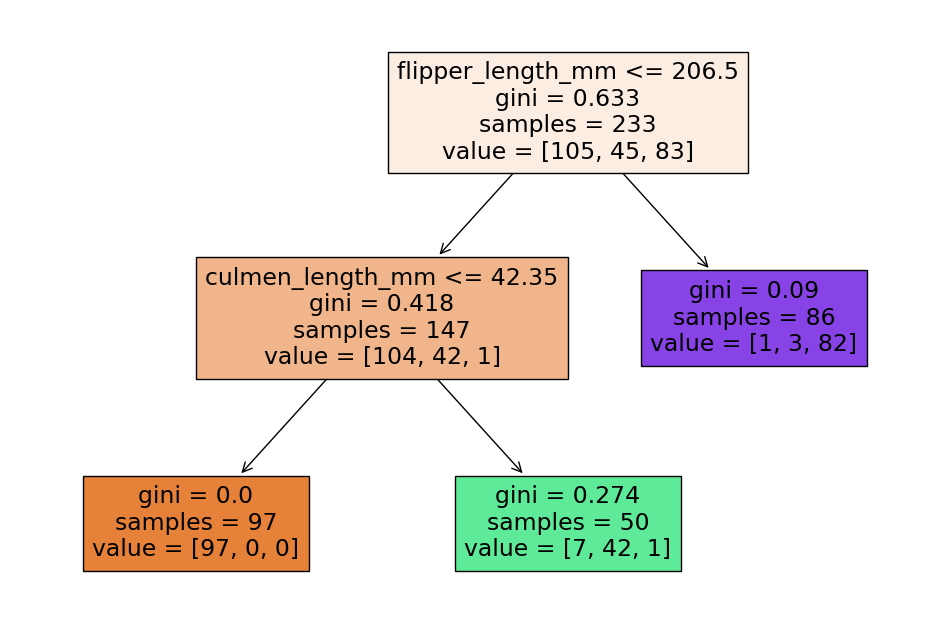

In [24]:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes=3)
max_leaf_tree.fit(X_train, y_train)

report_model(max_leaf_tree)

### Experimenting with Criterion

              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101





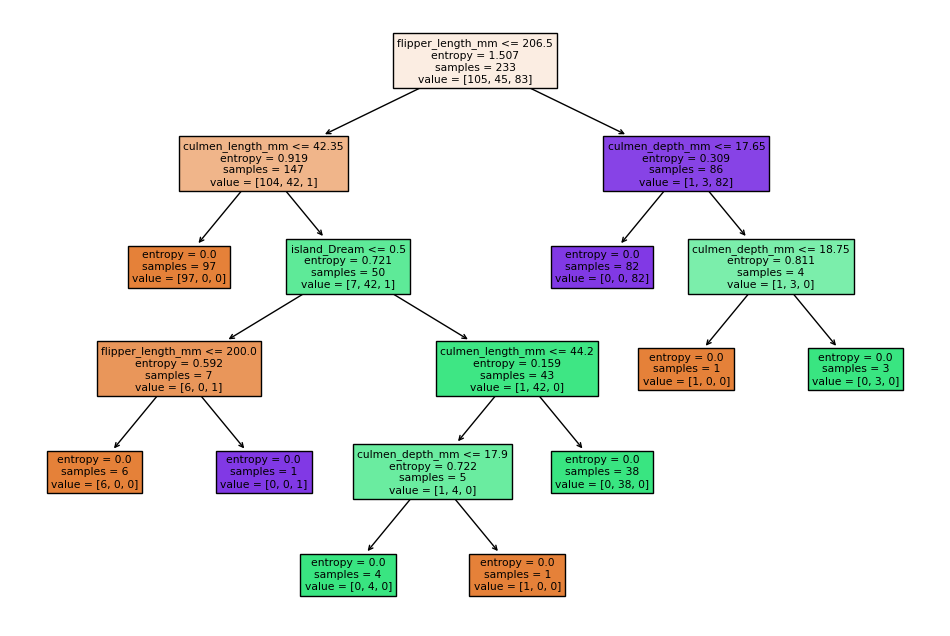

In [25]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train, y_train)

report_model(entropy_tree)